# Revealed Comparative Advantage

We next use the research space to predict the future presence of an individual, organization, or country in a research field. To make these predictions we define five possible states for individuals, organizations, or countries in a research field. These states are: inactive, active, nascent, intermediate, and developed.

In [17]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.cm as cmx

import sys
sys.path.append("../")
from lib.rs import research_space

In [4]:
key = "sjr"
rs = research_space(key)
rs.load(2011)
rs.set_institution("../../dataset/lattes/pesquisadores.csv", sep=";sep;")
areas = pd.read_pickle("../../dataset/SJR/areas.pkl")

In [5]:
rs.advantages()

### Visualizing Institution's  RCA

Major areas of some brazilian institutions. We'll measure the fraction of each category that achieves RCA > 1. Below, the chosen institutions:

In [6]:
insts = [
    "universidade federal de minas gerais",
    "universidade federal de lavras",
    "universidade de sao paulo",
    "universidade federal da paraiba",
    "universidade federal rural de pernambuco",
    "pontificia universidade catolica de minas gerais",
    "petrobras",
    "ministerio da fazenda"
]

In [19]:
dict_area = areas[["Field", "Classification"]].set_index("Field").to_dict()["Classification"]
unique = areas["Classification"].unique()[1:]
size = Counter(areas["Classification"].tolist())
macro = dict()

for sf, rca in rs.rca_institution.items():
    if rca > 1:
        if (sf[0], dict_area[sf[1]]) in macro:
            macro[(sf[0], dict_area[sf[1]])] += 1 / size[dict_area[sf[1]]]
        else:
            macro[(sf[0], dict_area[sf[1]])] = 1 / size[dict_area[sf[1]]] 

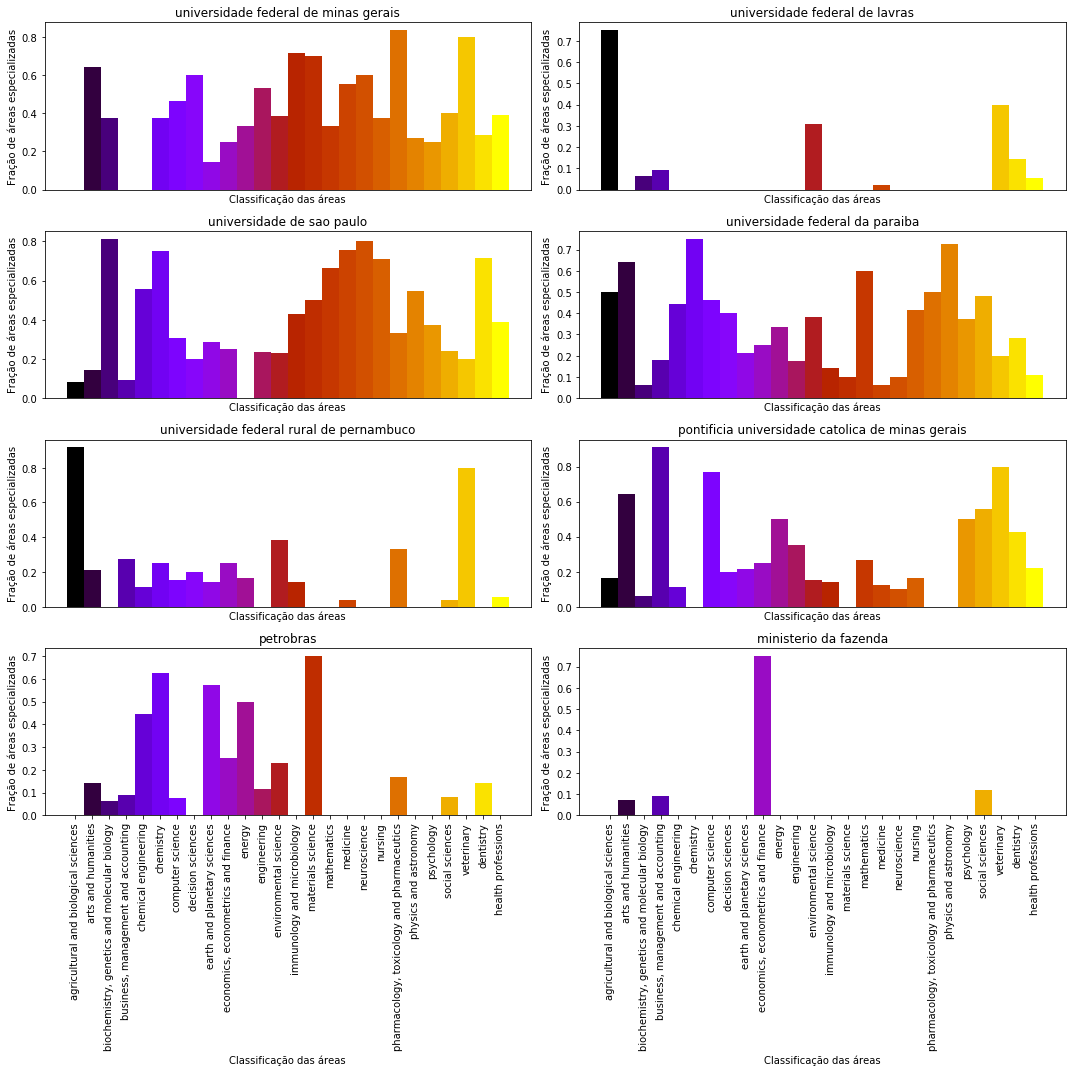

In [31]:
plt.rcParams["figure.figsize"] = (15,15)
cm = cmx.get_cmap('gnuplot', 26)
color = cm(np.linspace(0, 1, 26))
fig = plt.figure()

for i in range(len(insts)):
    uni = insts[i]
    areas_list = list()
    for a in unique:
        if (uni, a) in macro:
            areas_list.append(macro[(uni, a)])
        else:
            areas_list.append(0)

    sub = fig.add_subplot(4,2,i+1)
    plt.bar(unique, areas_list, color=color, width=1.0)
    plt.xticks(rotation=90)
    plt.title(uni)
    plt.ylabel("Fração de áreas especializadas")
    plt.xlabel("Classificação das áreas")
    if i < 6:
        sub.set_xticks([])
    
fig.tight_layout()
plt.show()

### Visualizing RCA on the Research Space

Now, we can see these abilities over the research space plot.

No handles with labels found to put in legend.


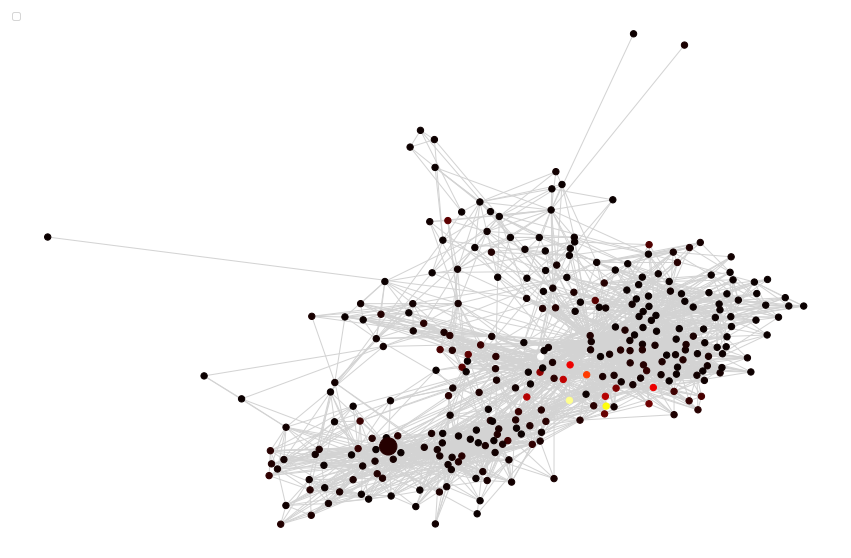

In [33]:
uni = "universidade federal de lavras"
vals = list()
for f in rs.fields:
    if (uni, f) in rs.rca_institution:
        vals.append(rs.rca_institution[(uni, f)])
    else:
        vals.append(0)

pos = rs.plot(vals)

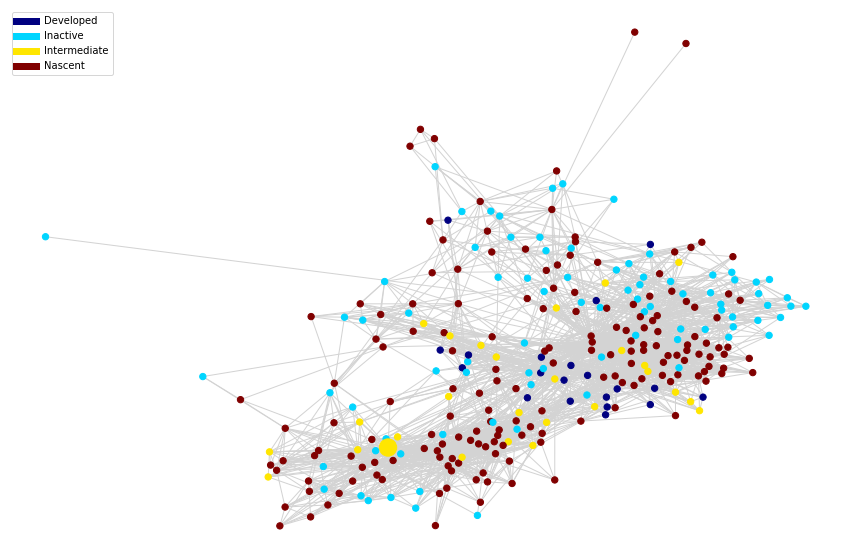

In [36]:
def rca_disc(val):
    if val == 0:
        return "Inactive"
    if val < 0.5:
        return "Nascent"
    if val < 1:
        return "Intermediate"
    else:
        return "Developed"

dict_area = {rs.fields[x]: rca_disc(vals[x]) for x in range(len(rs.fields))}
unique = ["Inactive", "Nascent", "Intermediate", "Developed"]
subs = {u: v for v,u in enumerate(sorted(unique))}
values = [subs[dict_area[node]] for node in rs.fields]

pos = rs.plot(values, labels=subs)